In [17]:
import pandas as pd
import numpy as np
import scipy

In [19]:
df = pd.read_csv('S816.dat', delimiter = '       ', header=None)
df = pd.DataFrame(
    np.row_stack([df.columns, df.values]),
    columns=['x', 'y']
)
df

C:\Users\vlad2\AppData\Local\Temp\ipykernel_73436\3002589666.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('S816.dat', delimiter = '       ', header=None)


,x,y
0,0.000,1.000000
1,0.000,0.000000
2,0.001,1.863024
3,0.002,-0.364436
4,0.003,0.529124
...,...,...
1628,1.627,-0.397026
1629,1.628,0.879276
1630,1.629,0.529124
1631,1.630,-0.364436


<Axes: xlabel='x'>

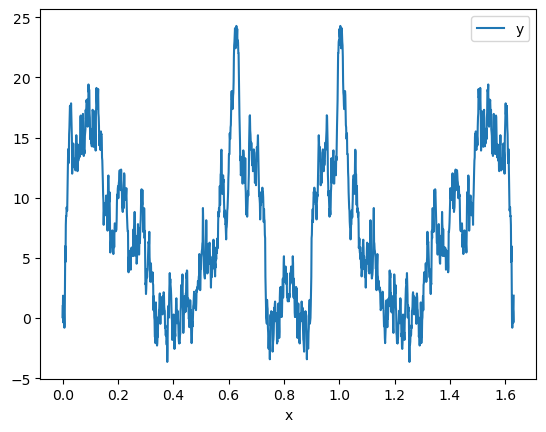

In [21]:
df.plot(x='x',y='y')

In [22]:
from scipy.fftpack import fft

In [29]:
column = df['y'].values
fft_result = fft(column)
df_fft = df
df_fft['y'] = fft_result

In [33]:
import matplotlib.pyplot as plt

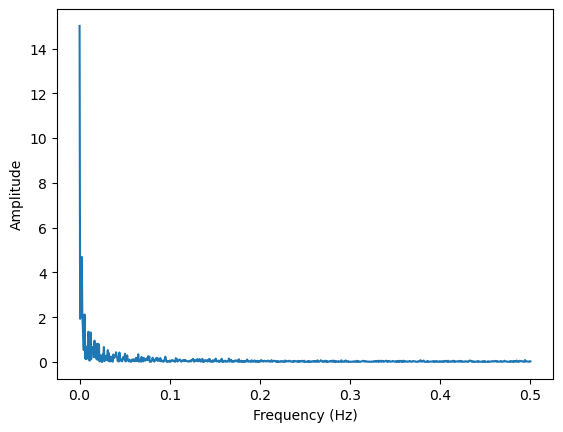

In [34]:
# Assuming 'fft_result' is the result of applying FFT
N = len(fft_result)
T = 1.0 / 1  # Assuming you have the sampling rate
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fft_result[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\vlad2\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\vlad2\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='x'>

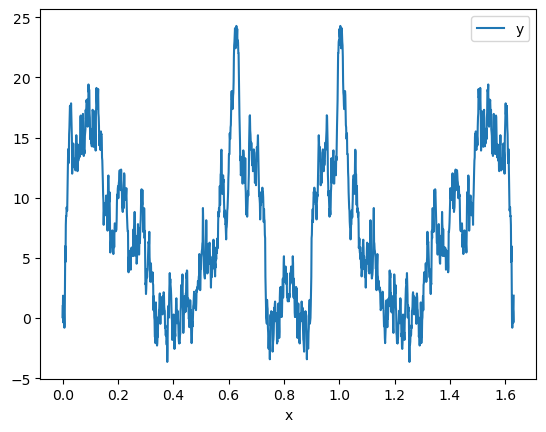

In [38]:
df_fft.plot(x='x',y='y')

In [36]:
# Apply FFT to the numpy array
fft_result = np.fft.fft(column)

# Apply IFFT to the FFT result
ifft_result = np.fft.ifft(fft_result)
df_ifft = df_fft
df_ifft['y'] = ifft_result

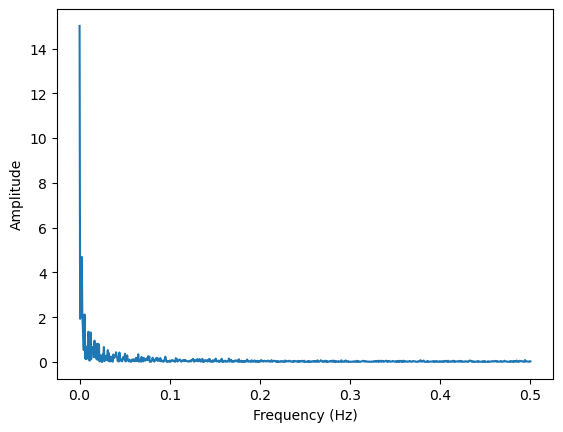

In [37]:
# Assuming 'fft_result' is the result of applying FFT
N = len(ifft_result)
T = 1.0 / 1  # Assuming you have the sampling rate
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fft_result[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\vlad2\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\vlad2\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='x'>

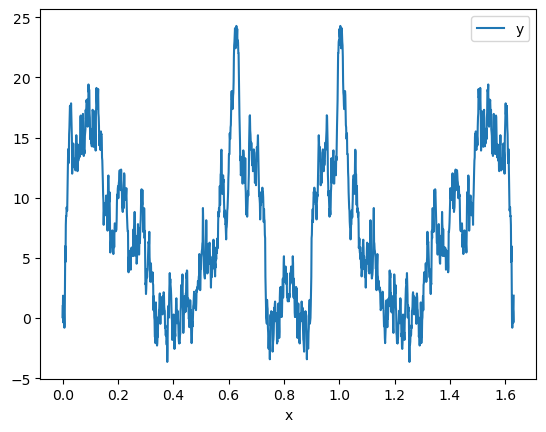

In [39]:
df_ifft.plot(x='x',y='y')